### Time Series
Load stock data from csv file.

In [1]:
import pandas as pd
%matplotlib inline

close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


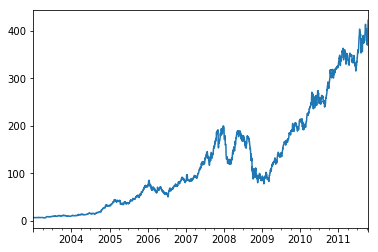

In [2]:
close_px['AAPL'].plot()

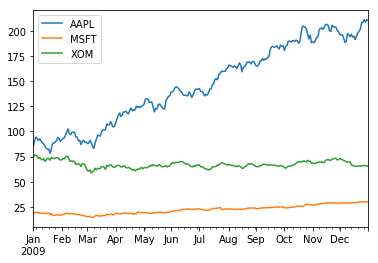

In [3]:
close_px.ix['2009'].plot()

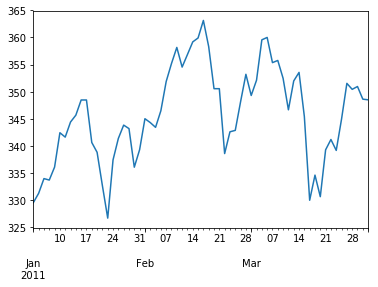

In [4]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

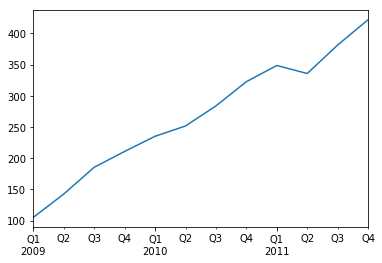

In [5]:
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.resample.html
appl_q = close_px['AAPL'].resample('Q-DEC').ffill() #['M', 'A', 'Q', 'BM', 'BA', 'BQ', 'W'])

appl_q.ix['2009':].plot()

### Moving Window Functions
Apple Daily Price with 250-day MA

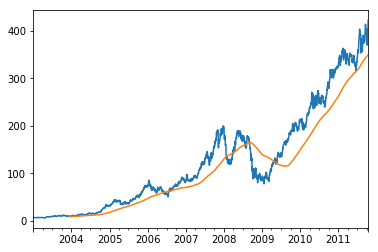

In [6]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window=250, center=False).mean().plot()

In [7]:
appl_std250 = close_px.AAPL.rolling(window=250, min_periods=10, center=False).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

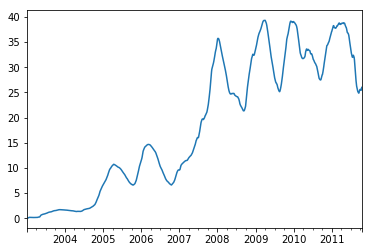

In [8]:
appl_std250.plot()

### Exponentially-weighted functions

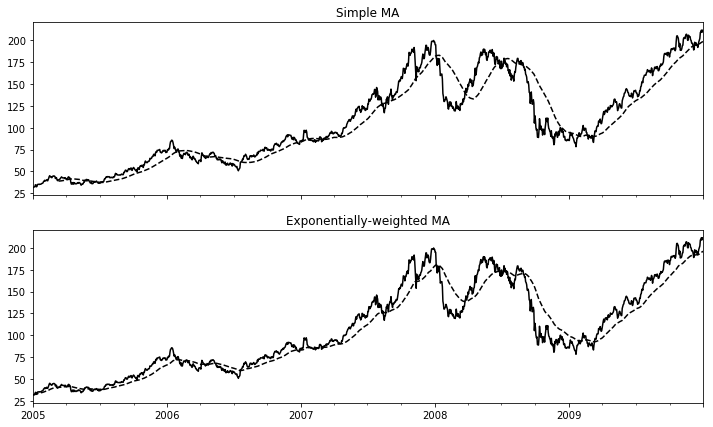

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# two subgraphs
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))

# data
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(window=60, min_periods=50,center=False).mean()
ewma60 = aapl_px.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()

# plot 0
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
axes[0].set_title('Simple MA')

# plot 1
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[1].set_title('Exponentially-weighted MA')